In [1]:
import sys
sys.path.append('../../Hallgerd/')

In [2]:
import numpy as np
import pylab as plt
import cv2

import hallgerd
from hallgerd.core import Sequential
from hallgerd.layers import Dense, Conv2D
from gunnar.core import Device
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataX, dataY = np.load('LV10slices.npy')
dataX = dataX[:,:,:,5].swapaxes(0,2)
dataY = dataY[:,:,:,5].swapaxes(0,2)
dataX = cv2.resize(dataX, (32,32))
dataY = cv2.resize(dataY, (32,32))
dataX = dataX.reshape(-1,62)
dataY = dataY.reshape(-1,62)

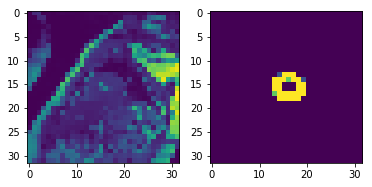

In [4]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(dataX[:,0].reshape(32,32))
ax[1].imshow(dataY[:,0].reshape(32,32))
plt.show()

In [5]:
devices = Device.getDevices()
dnames = [d for d in devices]

print('Found devices:\n\t{}'.format('\n\t'.join(dnames)))
print('\nUsing ', dnames[0])
gpu = Device([devices[dnames[0]]], DTYPE=np.float32, CTS=32, IBS=4, 
             TS=32, TSK=32, WPTM=4, WPTN=4)

Found devices:
	GeForce GTX 660

Using  GeForce GTX 660


In [6]:
model = Sequential(gpu, lr=1e-3, batch_size=1, epochs=15, loss='mse', 
                   dimages=(32,32,1), 
                   verbose=True)
model.add(Conv2D(1, 64, activation='relu', padding=0))
model.add(Conv2D(64, 64, activation='relu', padding=0))
model.add(Conv2D(64, 64, activation='relu', padding=0))
model.add(Conv2D(64, 1, activation='sigmoid', padding=0))

In [7]:
%%time
model.fit(dataX[:,:1], dataY[:,:1])

loss = 15.635862710876367: 100%|██████████| 15/15 [02:54<00:00, 11.62s/it]

CPU times: user 1min 35s, sys: 1min 19s, total: 2min 54s
Wall time: 2min 54s


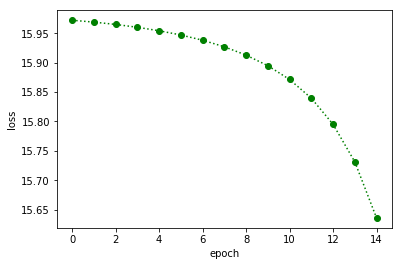

In [8]:
plt.plot(model.history['loss'], 'go:')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [9]:
out = model(dataX[:,:1])
np.max(out), np.min(out)

(0.49926543, 0.46209294)

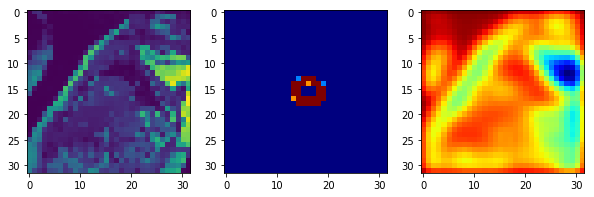

In [10]:
from matplotlib import cm
N = 0
fig, ax = plt.subplots(figsize=(10,3), ncols=3)
ax[0].imshow(dataX[:,N].reshape(32,32))
ax[1].imshow(dataY[:,N].reshape(32,32), cmap=cm.jet)
ax[2].imshow(out[:,N].reshape(32,32), cmap=cm.jet)
plt.show()